In [1]:
#GENERAL
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\CSE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pandas as pd
data = pd.read_csv('wavefiles.csv')
data

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


In [3]:
Directory = 'C:/Users/CSE/Downloads/CollegeProject-main/rnn_finals/melodies'

In [99]:
from tqdm import tqdm
import os

extracted_data = []
trial_data = []
# feature = np.zeros(1703,50)
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),str(row["file_name"]))
    class_labels= row["label"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    # feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    cA,cD = pywt.dwt(y, 'db2')#librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    feature = cA
    # feature = np.reshape(feature, (-1, 1703))
    scaled_feature = (np.mean(feature.T,axis=0))
    extracted_data.append([scaled_feature, class_labels])
    trial_data.append([feature,class_labels])
    

1703it [03:53,  7.30it/s]


In [100]:
feature_df = pd.DataFrame(trial_data, columns=['feature','class'])
# feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])
feature_df

,feature,class
0,"[0.07526451, 0.12547588, 0.37360847, 0.5929422...",antiviral
1,"[0.062308177, 0.103227764, 0.3053759, 0.485565...",antiviral
2,"[0.08416456, 0.13585177, 0.38789696, 0.6162133...",antiviral
3,"[0.043625437, 0.07317361, 0.21951966, 0.347467...",antiviral
4,"[0.043625437, 0.07317361, 0.21951966, 0.347467...",antiviral
...,...,...
1698,"[0.19609272, 0.31467336, 0.71396697, 0.8238927...",anti-coronavirus
1699,"[0.043221965, 0.08296647, 0.30366975, 0.514669...",anti-coronavirus
1700,"[0.043625437, 0.07317361, 0.21951966, 0.347467...",anti-coronavirus
1701,"[0.043625437, 0.07317361, 0.21951966, 0.347467...",anti-coronavirus


In [101]:
x = np.array(feature_df['feature'].tolist())

In [103]:
x.shape

(1703, 220501)

In [104]:
y = np.array(feature_df['class'].tolist())

In [105]:
print(x.shape)
print(y.shape)

(1703, 220501)
(1703,)


In [106]:
from sklearn import preprocessing

OHE_Function = OneHotEncoder()
Scaler_Function = StandardScaler()

In [107]:
Part_Y_Encode = OHE_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
print(Part_Y_Encode.shape)

(1703, 4)


In [108]:
Part_Y_Encode

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Part_Y_Encode, train_size=0.8, random_state = 42, shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1362, 220501)
(1362, 4)
(341, 220501)
(341, 4)


In [111]:
n_seq = 1
n_steps = 220501
X_train = X_train.reshape(X_train.shape[0], n_seq, n_steps)
X_test = X_test.reshape(X_test.shape[0], n_seq, n_steps)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(1362, 1, 220501)
(341, 1, 220501)
(1362, 4)


In [112]:
output_labels = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = "adam"

In [113]:
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.models import Sequential


#Adding the input LSTM network layer
LSTM_model= Sequential()
LSTM_model.add(LSTM(128, input_shape=(1,220501), return_sequences=True))
LSTM_model.add(Dropout(0.2))
# model_LSTM.add(Dense(10, activation='softmax'))

#Adding a second LSTM network layer
LSTM_model.add(LSTM(512, return_sequences=True))
LSTM_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(640, return_sequences=True, recurrent_dropout=0.1)))
LSTM_model.add(LSTM(1024, return_sequences=True))
LSTM_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True, recurrent_dropout=0.1)))
LSTM_model.add(LSTM(2048, return_sequences=True))
LSTM_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, recurrent_dropout=0.1)))
LSTM_model.add(LSTM(100))

#Adding a dense hidden layer

LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dropout(0.2))

#Adding the output layer
LSTM_model.add(Dense(output_labels, activation='softmax'))
LSTM_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 1, 128)            112962560 
                                                                 
 dropout_18 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_46 (LSTM)              (None, 1, 512)            1312768   
                                                                 
 bidirectional_7 (Bidirectio  (None, 1, 1280)          5903360   
 nal)                                                            
                                                                 
 lstm_48 (LSTM)              (None, 1, 1024)           9441280   
                                                                 
 bidirectional_8 (Bidirectio  (None, 1, 1024)          6295552   
 nal)                                                 

In [21]:
# import tensorflow as tf
# Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
# Call_Back_Check_Hybrid = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
#                                                      save_best_only=True,
#                                                      filepath="./my_LSTM_model")

In [114]:
LSTM_model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)
import tensorflow as tf
Call_Back_Early_Stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Call_Back_Check_Hybrid = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_LSTM_model")

In [115]:
LSTM_Model = LSTM_model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), callbacks=[Call_Back_Early_Stop,Call_Back_Check_Hybrid])
print("Done")

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 1.3687 - accuracy: 0.3473

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 78s 6s/step - loss: 1.3687 - accuracy: 0.3473 - val_loss: 1.3318 - val_accuracy: 0.3343
Epoch 2/100
11/11 [==============================] - 26s 2s/step - loss: 1.2878 - accuracy: 0.3480 - val_loss: 1.2619 - val_accuracy: 0.3343
Epoch 3/100
11/11 [==============================] - 26s 2s/step - loss: 1.2619 - accuracy: 0.3231 - val_loss: 1.2544 - val_accuracy: 0.3343
Epoch 4/100
11/11 [==============================] - 26s 2s/step - loss: 1.2609 - accuracy: 0.3451 - val_loss: 1.2489 - val_accuracy: 0.3343
Epoch 5/100
11/11 [==============================] - ETA: 0s - loss: 1.2415 - accuracy: 0.3598

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.2415 - accuracy: 0.3598 - val_loss: 1.2391 - val_accuracy: 0.3607
Epoch 6/100
11/11 [==============================] - 26s 2s/step - loss: 1.2345 - accuracy: 0.3686 - val_loss: 1.2326 - val_accuracy: 0.3548
Epoch 7/100
11/11 [==============================] - 26s 2s/step - loss: 1.2323 - accuracy: 0.3744 - val_loss: 1.2278 - val_accuracy: 0.3607
Epoch 8/100
11/11 [==============================] - ETA: 0s - loss: 1.2340 - accuracy: 0.3877

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 6s/step - loss: 1.2340 - accuracy: 0.3877 - val_loss: 1.2269 - val_accuracy: 0.3636
Epoch 9/100
11/11 [==============================] - ETA: 0s - loss: 1.2203 - accuracy: 0.3957

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.2203 - accuracy: 0.3957 - val_loss: 1.2261 - val_accuracy: 0.3871
Epoch 10/100
11/11 [==============================] - ETA: 0s - loss: 1.2179 - accuracy: 0.4046

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.2179 - accuracy: 0.4046 - val_loss: 1.2161 - val_accuracy: 0.3988
Epoch 11/100
11/11 [==============================] - ETA: 0s - loss: 1.2158 - accuracy: 0.4222

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.2158 - accuracy: 0.4222 - val_loss: 1.2231 - val_accuracy: 0.4663
Epoch 12/100
11/11 [==============================] - ETA: 0s - loss: 1.1837 - accuracy: 0.4699

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.1837 - accuracy: 0.4699 - val_loss: 1.1977 - val_accuracy: 0.4692
Epoch 13/100
11/11 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.4655

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 58s 6s/step - loss: 1.1733 - accuracy: 0.4655 - val_loss: 1.1688 - val_accuracy: 0.4868
Epoch 14/100
11/11 [==============================] - 26s 2s/step - loss: 1.1694 - accuracy: 0.4890 - val_loss: 1.1726 - val_accuracy: 0.4751
Epoch 15/100
11/11 [==============================] - 26s 2s/step - loss: 1.1530 - accuracy: 0.5000 - val_loss: 1.1788 - val_accuracy: 0.4839
Epoch 16/100
11/11 [==============================] - 26s 2s/step - loss: 1.1466 - accuracy: 0.5066 - val_loss: 1.1708 - val_accuracy: 0.4868
Epoch 17/100
11/11 [==============================] - 26s 2s/step - loss: 1.1377 - accuracy: 0.5037 - val_loss: 1.1418 - val_accuracy: 0.4751
Epoch 18/100
11/11 [==============================] - 26s 2s/step - loss: 1.1361 - accuracy: 0.4963 - val_loss: 1.1818 - val_accuracy: 0.4487
Epoch 19/100
11/11 [==============================] - 26s 2s/step - loss: 1.1270 - accuracy: 0.5095 - val_loss: 1.1730 - val_accuracy: 0.4868
Epoch 20/100
11/11 

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.1157 - accuracy: 0.5220 - val_loss: 1.1573 - val_accuracy: 0.4927
Epoch 21/100
11/11 [==============================] - 26s 2s/step - loss: 1.1119 - accuracy: 0.5162 - val_loss: 1.1635 - val_accuracy: 0.4839
Epoch 22/100
11/11 [==============================] - 26s 2s/step - loss: 1.0883 - accuracy: 0.5323 - val_loss: 1.1673 - val_accuracy: 0.4809
Epoch 23/100
11/11 [==============================] - ETA: 0s - loss: 1.0685 - accuracy: 0.5323

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 6s/step - loss: 1.0685 - accuracy: 0.5323 - val_loss: 1.1404 - val_accuracy: 0.4956
Epoch 24/100
11/11 [==============================] - 26s 2s/step - loss: 1.0568 - accuracy: 0.5396 - val_loss: 1.1259 - val_accuracy: 0.4721
Epoch 25/100
11/11 [==============================] - 26s 2s/step - loss: 1.0667 - accuracy: 0.5463 - val_loss: 1.1200 - val_accuracy: 0.4956
Epoch 26/100
11/11 [==============================] - 26s 2s/step - loss: 1.0384 - accuracy: 0.5352 - val_loss: 1.1623 - val_accuracy: 0.4868
Epoch 27/100
11/11 [==============================] - 26s 2s/step - loss: 1.0670 - accuracy: 0.5352 - val_loss: 1.1009 - val_accuracy: 0.4927
Epoch 28/100
11/11 [==============================] - ETA: 0s - loss: 1.0328 - accuracy: 0.5441

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.0328 - accuracy: 0.5441 - val_loss: 1.1175 - val_accuracy: 0.5279
Epoch 29/100
11/11 [==============================] - 26s 2s/step - loss: 1.0358 - accuracy: 0.5455 - val_loss: 1.1126 - val_accuracy: 0.5220
Epoch 30/100
11/11 [==============================] - ETA: 0s - loss: 1.0300 - accuracy: 0.5507

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 57s 5s/step - loss: 1.0300 - accuracy: 0.5507 - val_loss: 1.0920 - val_accuracy: 0.5660
Epoch 31/100
11/11 [==============================] - 26s 2s/step - loss: 0.9972 - accuracy: 0.5830 - val_loss: 1.0997 - val_accuracy: 0.5630
Epoch 32/100
11/11 [==============================] - 26s 2s/step - loss: 1.0225 - accuracy: 0.5463 - val_loss: 1.1105 - val_accuracy: 0.5455
Epoch 33/100
11/11 [==============================] - 26s 2s/step - loss: 1.0117 - accuracy: 0.5661 - val_loss: 1.1160 - val_accuracy: 0.4985
Epoch 34/100
11/11 [==============================] - 26s 2s/step - loss: 0.9963 - accuracy: 0.5595 - val_loss: 1.0783 - val_accuracy: 0.5279
Epoch 35/100
11/11 [==============================] - 26s 2s/step - loss: 0.9814 - accuracy: 0.5661 - val_loss: 1.0926 - val_accuracy: 0.5367
Epoch 36/100
11/11 [==============================] - 26s 2s/step - loss: 0.9788 - accuracy: 0.5705 - val_loss: 1.0784 - val_accuracy: 0.5425
Epoch 37/100
11/11 

INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


INFO:tensorflow:Assets written to: .\my_LSTM_model\assets


11/11 [==============================] - 58s 6s/step - loss: 0.9358 - accuracy: 0.5866 - val_loss: 1.0774 - val_accuracy: 0.5689
Epoch 42/100
11/11 [==============================] - 26s 2s/step - loss: 0.9510 - accuracy: 0.5844 - val_loss: 1.0877 - val_accuracy: 0.5455
Epoch 43/100
11/11 [==============================] - 26s 2s/step - loss: 0.9419 - accuracy: 0.5837 - val_loss: 1.0731 - val_accuracy: 0.5308
Epoch 44/100
11/11 [==============================] - 26s 2s/step - loss: 0.9662 - accuracy: 0.5815 - val_loss: 1.0474 - val_accuracy: 0.5572
Done


In [116]:
train_accuracy = LSTM_model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy of LSTM: ", train_accuracy[1])

test_accuracy = LSTM_model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy of LSTM: ", test_accuracy[1])

Training Accuracy of LSTM:  0.6262848973274231
Testing Accuracy of LSTM:  0.5571847558021545


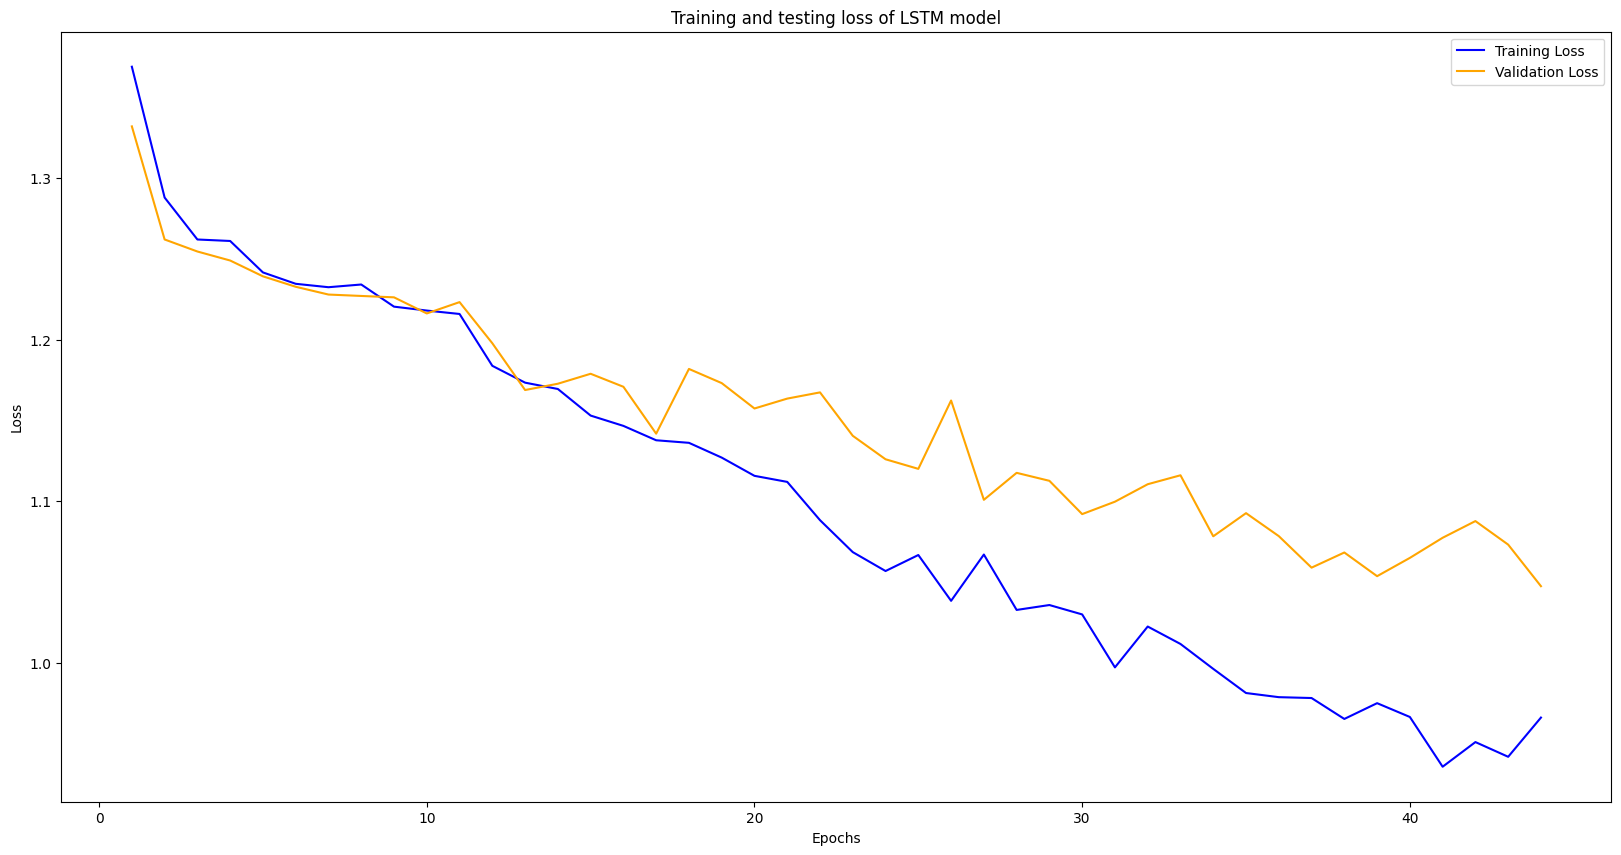

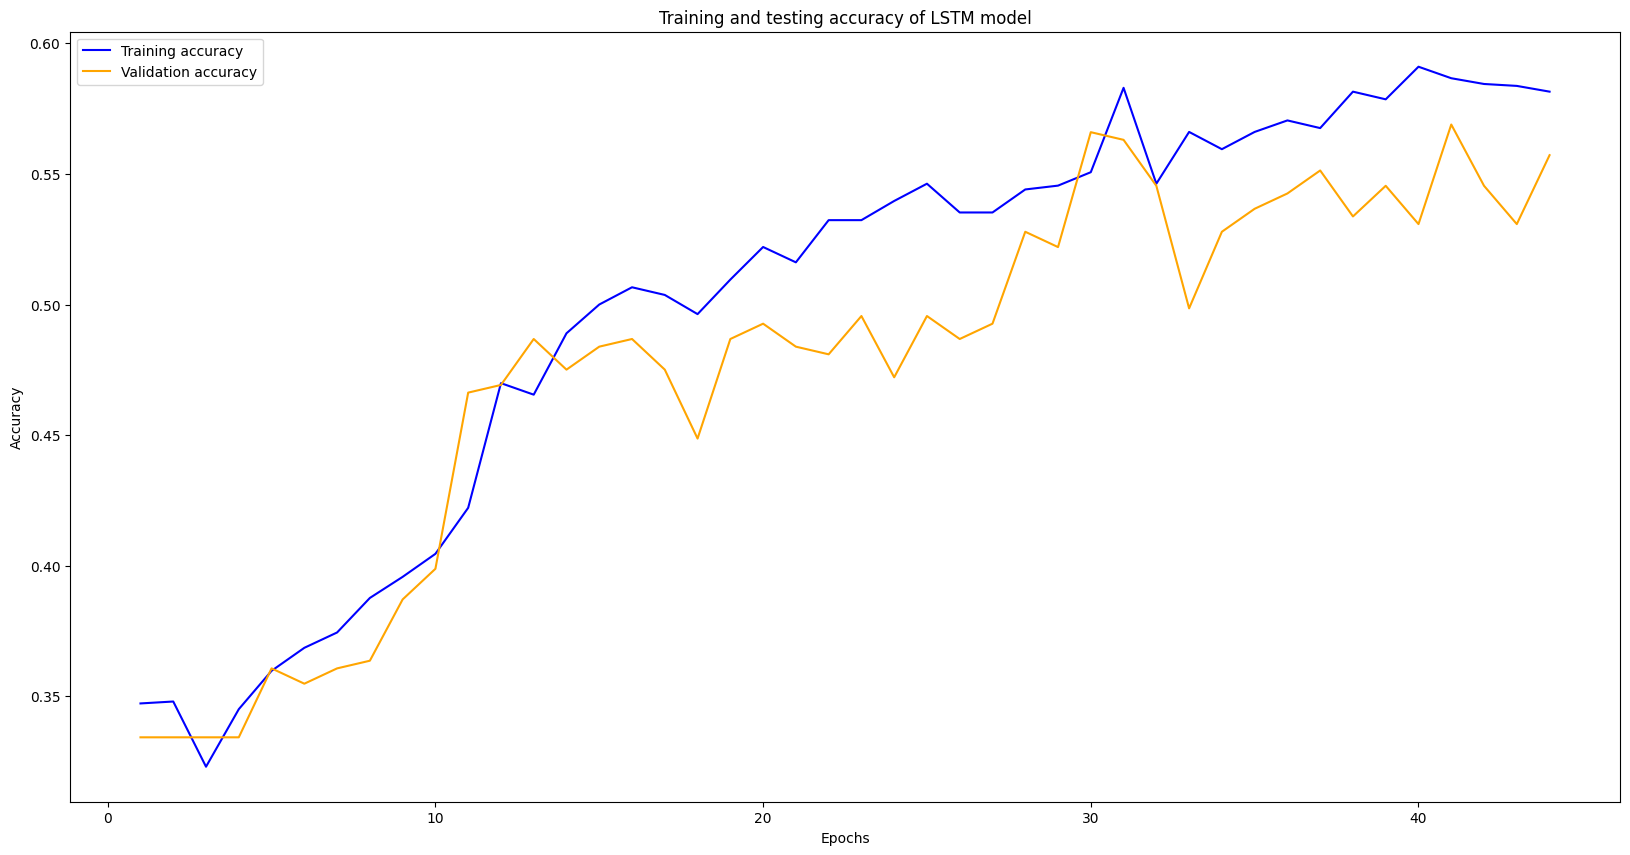

In [120]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,45)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

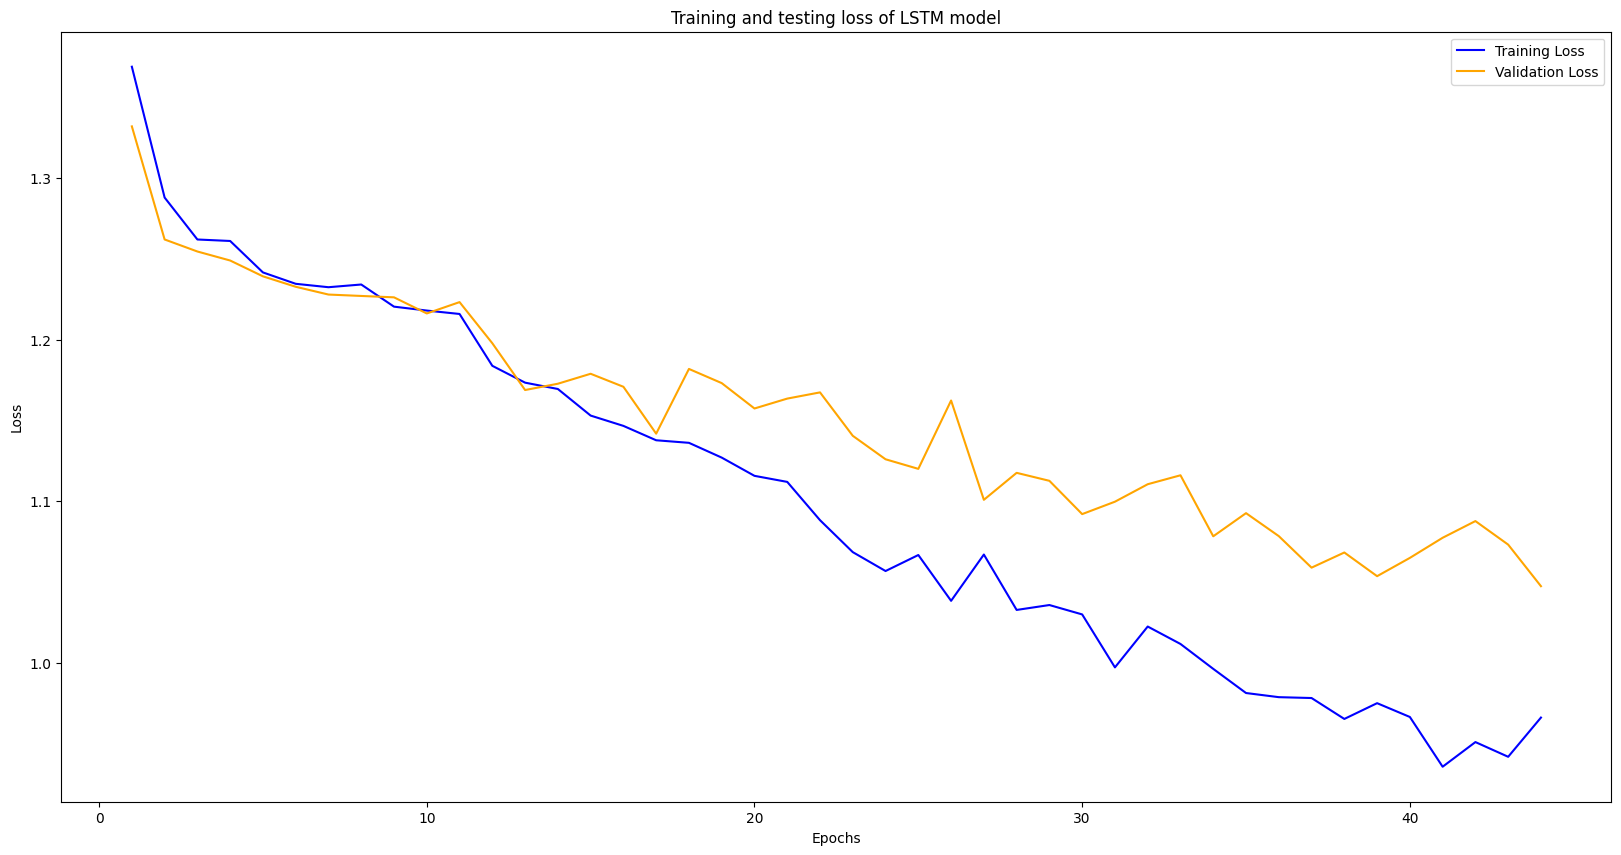

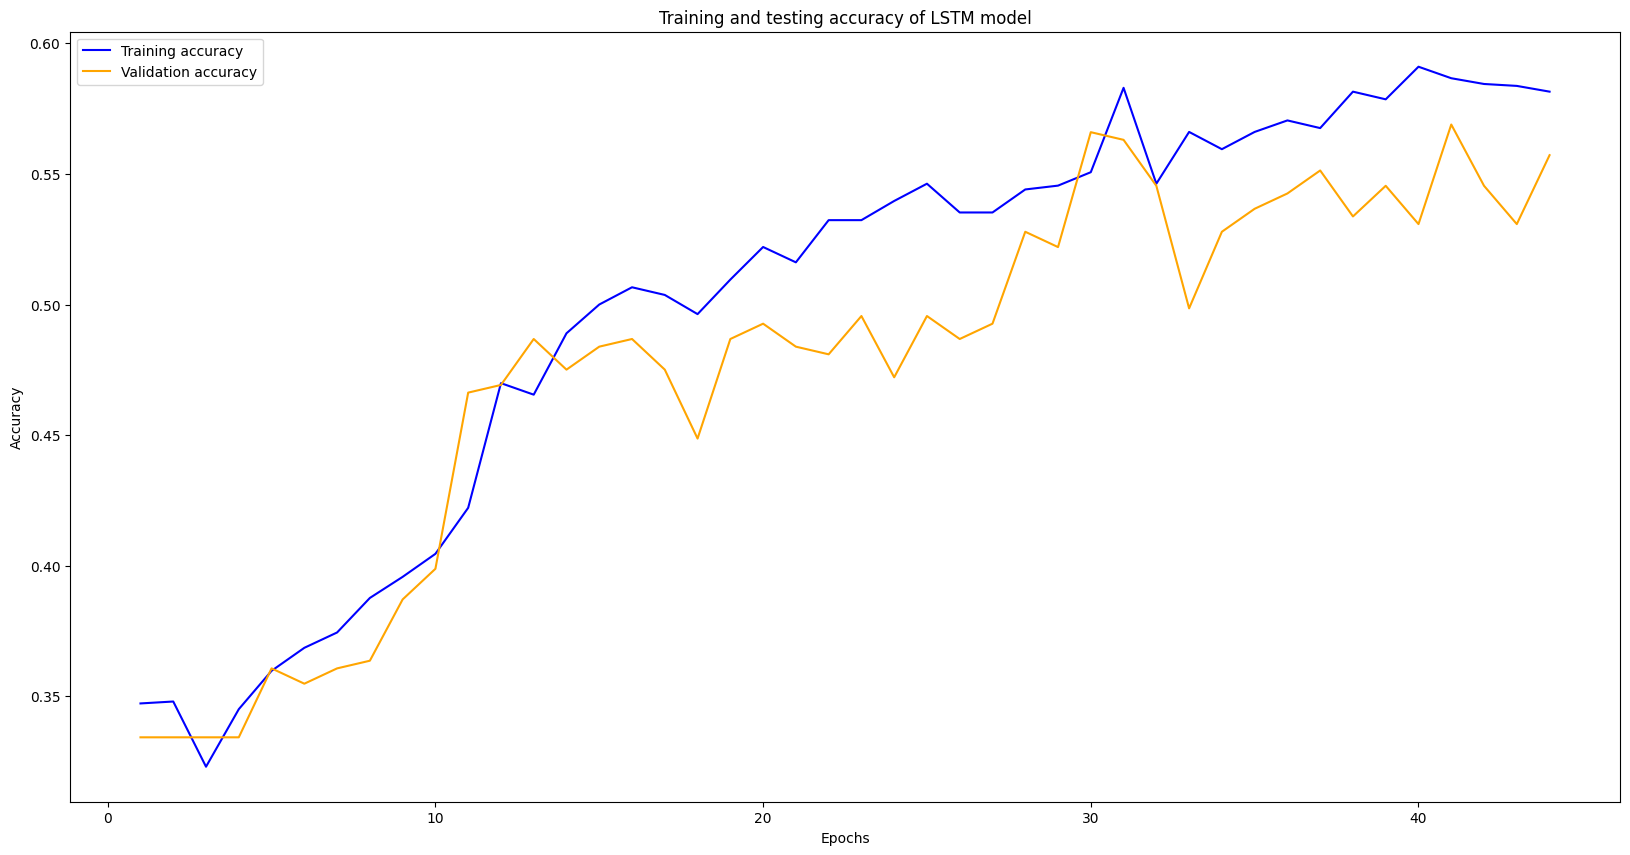

In [121]:
history_dict=LSTM_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,45)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'LSTM'}>

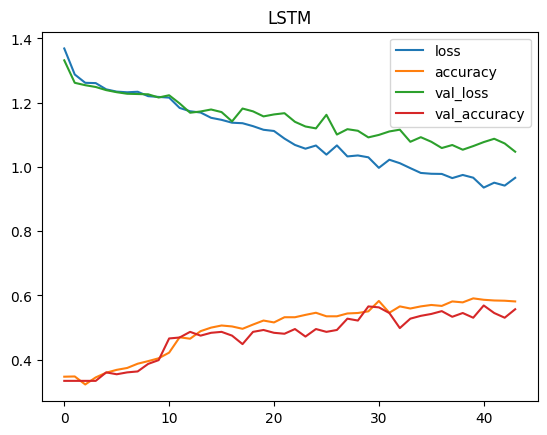

In [122]:
#1
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

<AxesSubplot: title={'center': 'LSTM'}>

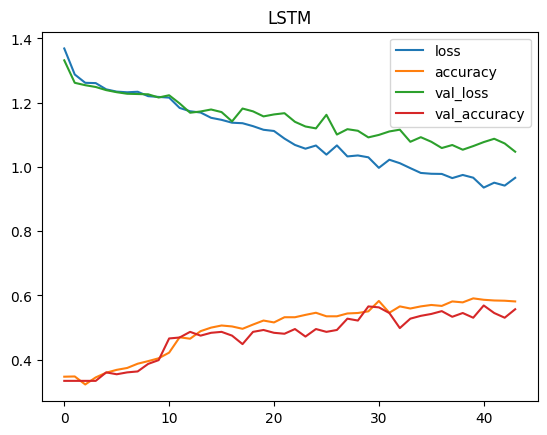

In [123]:
#2
Grap_Data_LSTM = pd.DataFrame(LSTM_Model.history)
Grap_Data_LSTM.plot(title='LSTM')

In [77]:
LSTM_model.save('saved_models/LSTM_model')

INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


INFO:tensorflow:Assets written to: saved_models/LSTM_model\assets


In [79]:
import tensorflow as tf
LSTM_model=tf.keras.models.load_model('saved_models/LSTM_model')

In [80]:
y_pred = LSTM_model.predict(X_test)

11/11 [==============================] - 1s 5ms/step


In [81]:
y_pred

array([[1.21169095e-03, 6.04889169e-03, 3.27400267e-02, 9.59999382e-01],
       [1.10753410e-01, 8.58097076e-01, 3.06865275e-02, 4.62932658e-04],
       [1.92343920e-01, 8.72594491e-02, 4.78136480e-01, 2.42260143e-01],
       ...,
       [3.05311382e-01, 5.50843418e-01, 1.20001994e-01, 2.38431841e-02],
       [8.67736191e-02, 7.95710146e-01, 5.43459915e-02, 6.31702691e-02],
       [3.64830680e-02, 4.80623573e-01, 4.69280422e-01, 1.36129595e-02]],
      dtype=float32)

In [83]:
y_pred_labels=[]
for j in range (0,len(y_pred)):
    max=y_pred[j][0]
    index=0
    for i in range(1,len(y_pred[j])):
        if(y_pred[j][i]>max):
            max=y_pred[j][i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_pred_labels.append(class_name)

In [85]:
y_test_labels=[]
for j in range (0,len(Y_test)):
    index=0
    for i in range(0,len(Y_test[j])):
        if(Y_test[j][i]==1):
            max=Y_test[j][i]
            index=i
            break
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_test_labels.append(class_name)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [87]:
cm_df = pd.DataFrame(cm, index = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'], 
                     columns = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'])
cm_df

,anti-coronavirus,antiviral,exp-non-antiviral,random-seq-non-antiviral
anti-coronavirus,3,12,4,3
antiviral,0,104,11,10
exp-non-antiviral,2,24,37,17
random-seq-non-antiviral,0,13,14,87


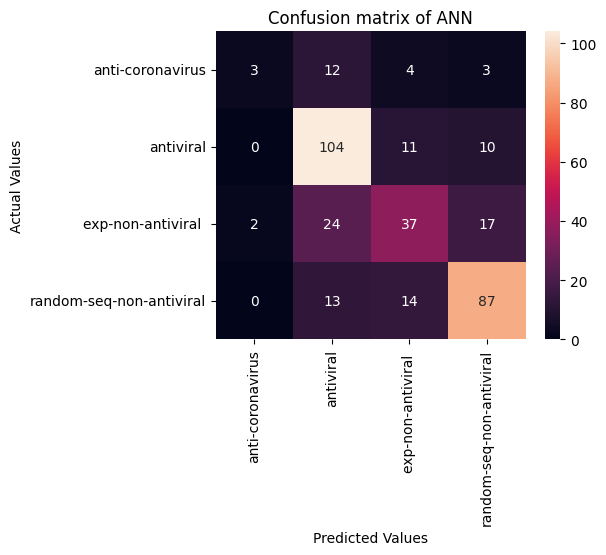

In [88]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True, fmt = 'd')
plt.title("Confusion matrix of ANN")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [95]:
print('                   Classification report of LTSM')
print('                   -----------------------------')
print('')
print(classification_report(y_test_labels, y_pred_labels))

                   Classification report of LTSM
                   -----------------------------

                          precision    recall  f1-score   support

        anti-coronavirus       0.60      0.14      0.22        22
               antiviral       0.68      0.83      0.75       125
       exp-non-antiviral       0.56      0.46      0.51        80
random-seq-non-antiviral       0.74      0.76      0.75       114

                accuracy                           0.68       341
               macro avg       0.65      0.55      0.56       341
            weighted avg       0.67      0.68      0.66       341

